# SFR density at $z \sim 0$

In [47]:
# imports
import numpy as np

import matplotlib.pyplot as plt

In [2]:
%matplotlib ipympl

# SFR/M* from Leroy+2019 (Equation 19)

## $\log_{10} {\rm SFR/M_*} = -0.32 \log_{10} [M_*/10^{10} M_\odot] - 10.17$

In [6]:
def SFR_leroy(M):
    return M**(0.68)

# $\Phi(M)$ from GAMA  [note M here is $M_*$ and they use $M^*$ for the characteristic mass!]

## $\Phi(M) \propto \exp(-M/M^*) \left [ \phi_1^* \left (\frac{M}{M^*} \right )^{\alpha_1} + \phi_2^* \left (\frac{M}{M^*} \right )^{\alpha_2} \right ]$

## With

### $\frac{\phi_1^*}{\phi_2^*} = \frac{3.96}{0.79}$
### $\alpha_1 = -0.35$
### $\alpha_2 = -1.47$
### $M^* = 10^{10.66} M_\odot$

In [16]:
def phi_gama(M, phi_1=3.96, phi_2=0.79, alpha_1=-0.35, alpha_2=-1.47):
    Mstar = 10**(10.66)
    return np.exp(-M/Mstar) * (phi_1*(M/Mstar)**alpha_1 + phi_2*(M/Mstar)**alpha_2)

# Calculate

In [44]:
log_Ms = np.linspace(7., 12, 100)
Ms = 10**log_Ms
dMs = Ms - np.roll(Ms,1)
dMs[0] = dMs[1]

In [39]:
log_SFR = np.log10(SFR_leroy(Ms))
SFR = 10**log_SFR

In [40]:
Phi = phi_gama(Ms)

## $\rho_* = \int \Phi(M) \, SFR(M) dM$

In [45]:
rho_sfr = np.sum(Phi * SFR * dMs)
cum_rho = np.cumsum(Phi*SFR * dMs)

# Plots

## SFR/M*

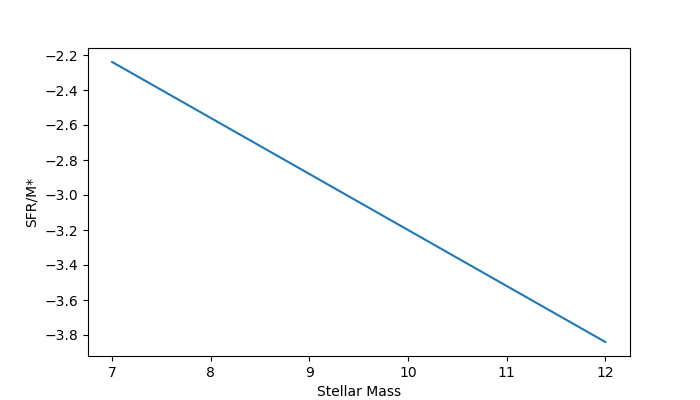

In [33]:
#
fig = plt.figure(figsize=(7,4))

plt.clf()
ax = plt.gca()
#
ax.plot(log_Ms, log_SFR - log_Ms)
#
ax.set_xlabel('Stellar Mass')
ax.set_ylabel('SFR/M*')
#
#ax.set_xscale('log')
#ax.set_yscale('log')
#
plt.show()

## $\Phi(M)$

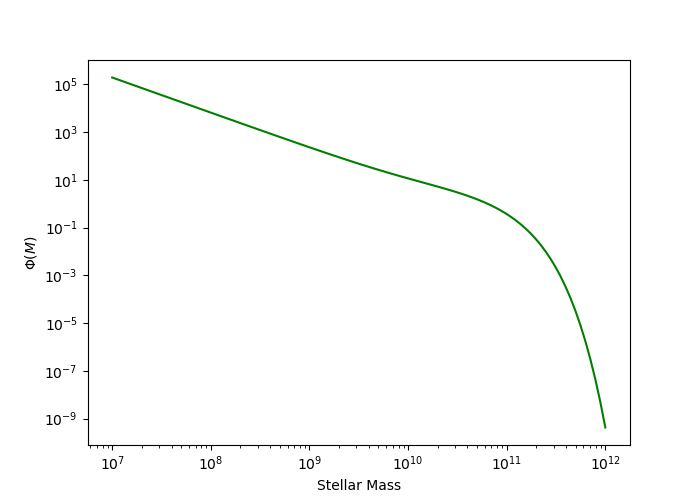

In [32]:
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax.plot(Ms, Phi, 'g')
#
ax.set_xlabel('Stellar Mass')
ax.set_ylabel(r'$\Phi(M)$')
#
ax.set_xscale('log')
ax.set_yscale('log')
#
plt.show()

## $\rho_*$

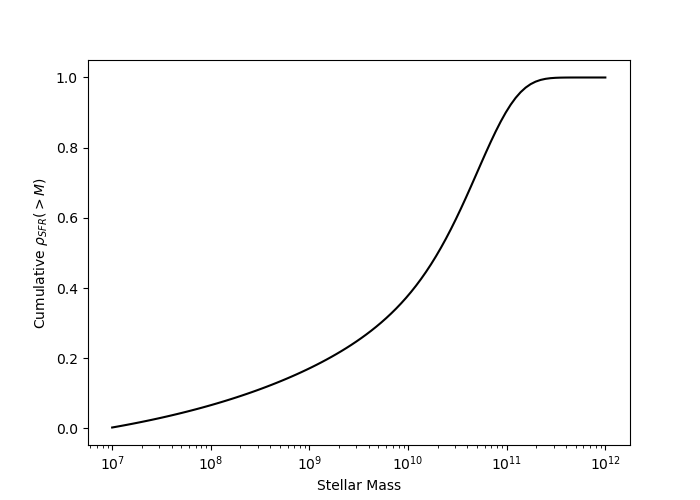

In [46]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax.plot(Ms, cum_rho/cum_rho[-1], 'k')
#
ax.set_xlabel('Stellar Mass')
ax.set_ylabel(r'Cumulative $\rho_{SFR} (>M)$')
#
ax.set_xscale('log')
#ax.set_yscale('log')
#
plt.show()

----

In [26]:
def tM(M):
    return M**0.19

In [27]:
y = tM(Ms)

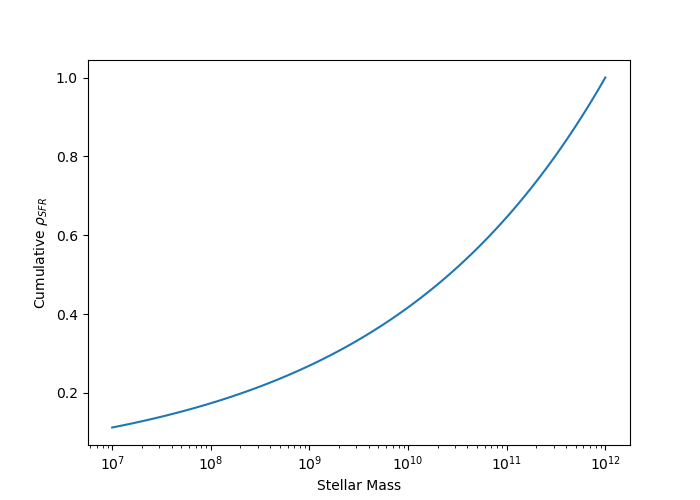

In [37]:
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
#
ax.plot(Ms, y/y[-1])
#
ax.set_xlabel('Stellar Mass')
ax.set_ylabel(r'Cumulative $\rho_{SFR}$')
#
ax.set_xscale('log')
#ax.set_yscale('log')
#
plt.show()